🔧 Key Features:
1. Single Mass System

Undamped, underdamped, critically damped, and overdamped responses
Phase portraits and energy analysis
Frequency response analysis

2. Two-Mass Coupled System

Normal mode analysis
Different coupling strengths
Frequency spectrum analysis

3. Interactive Visualizations

Real-time animated spring-mass system
Interactive sliders to adjust parameters
Phase space trajectories

4. Comprehensive Analysis

Energy conservation plots
Mode shapes and frequencies
FFT analysis for frequency content

Spring-Mass System Visualization Demo

1. Single Mass System Analysis...


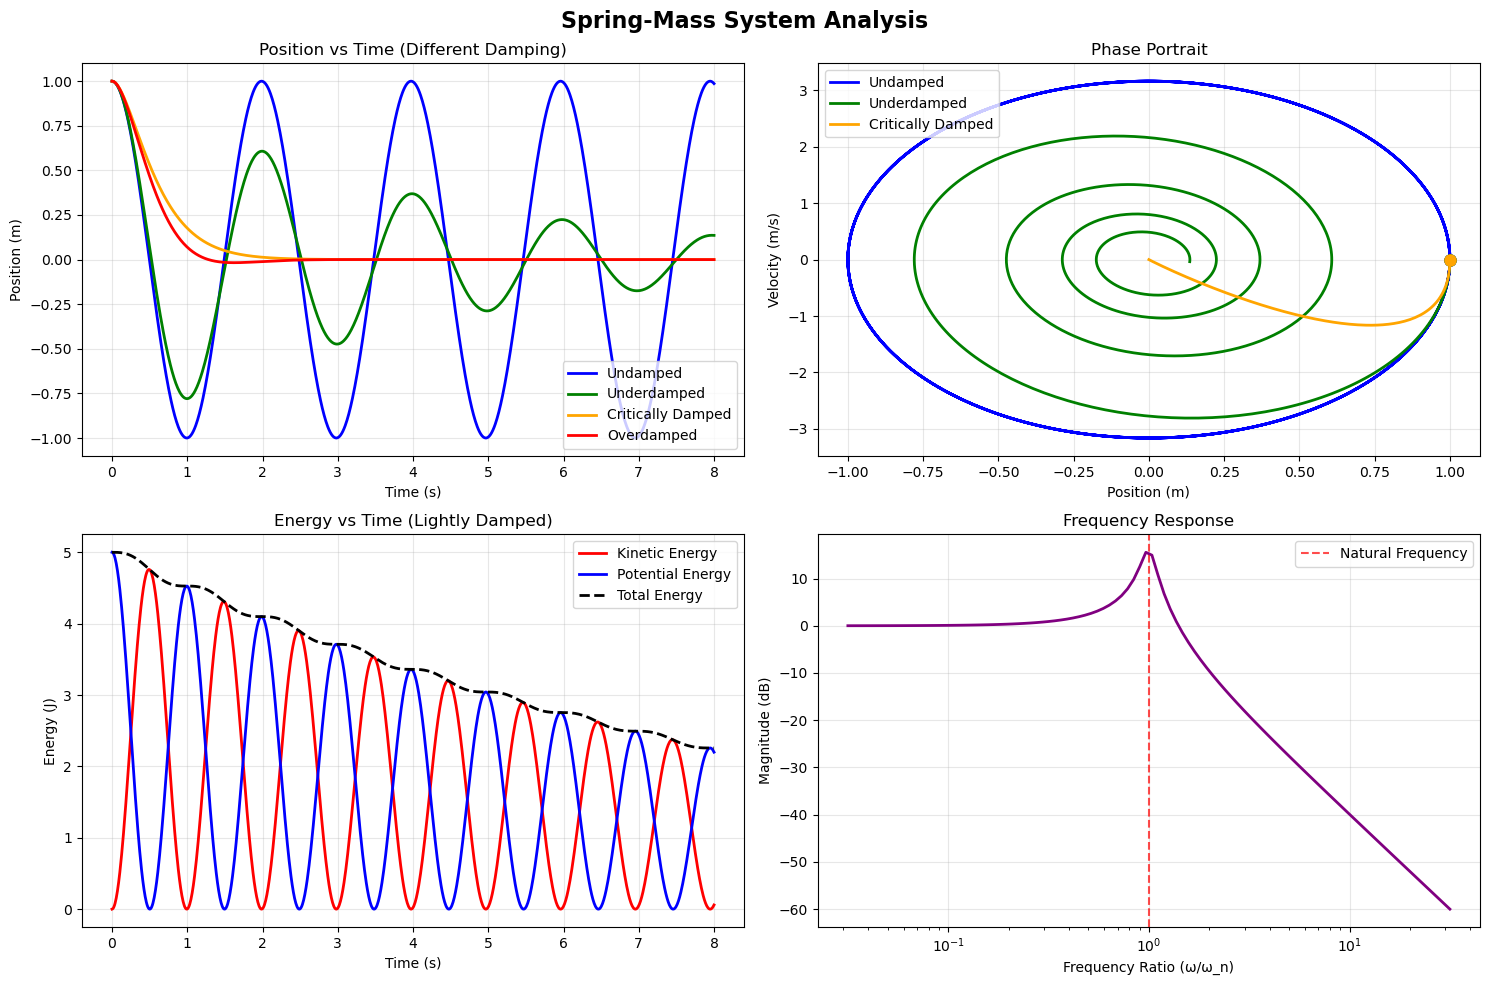


2. Creating Animated Single Mass System...


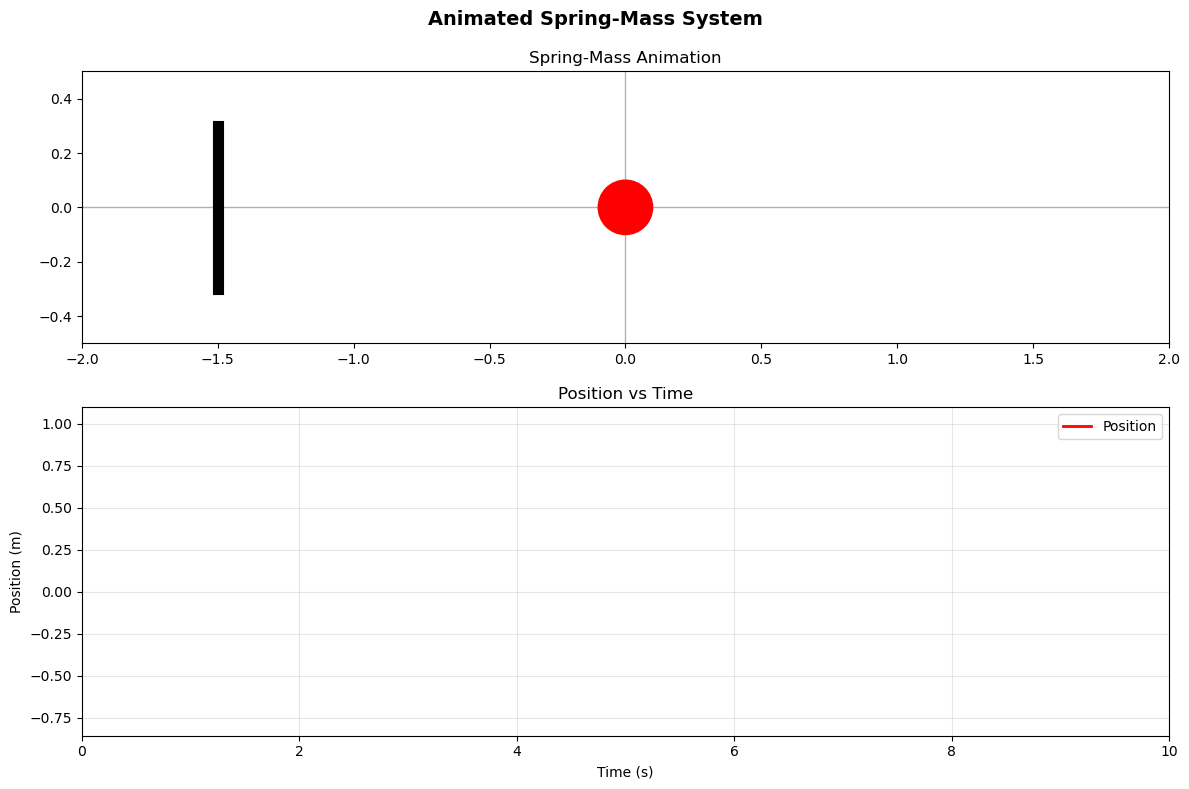


3. Two-Mass System Analysis...


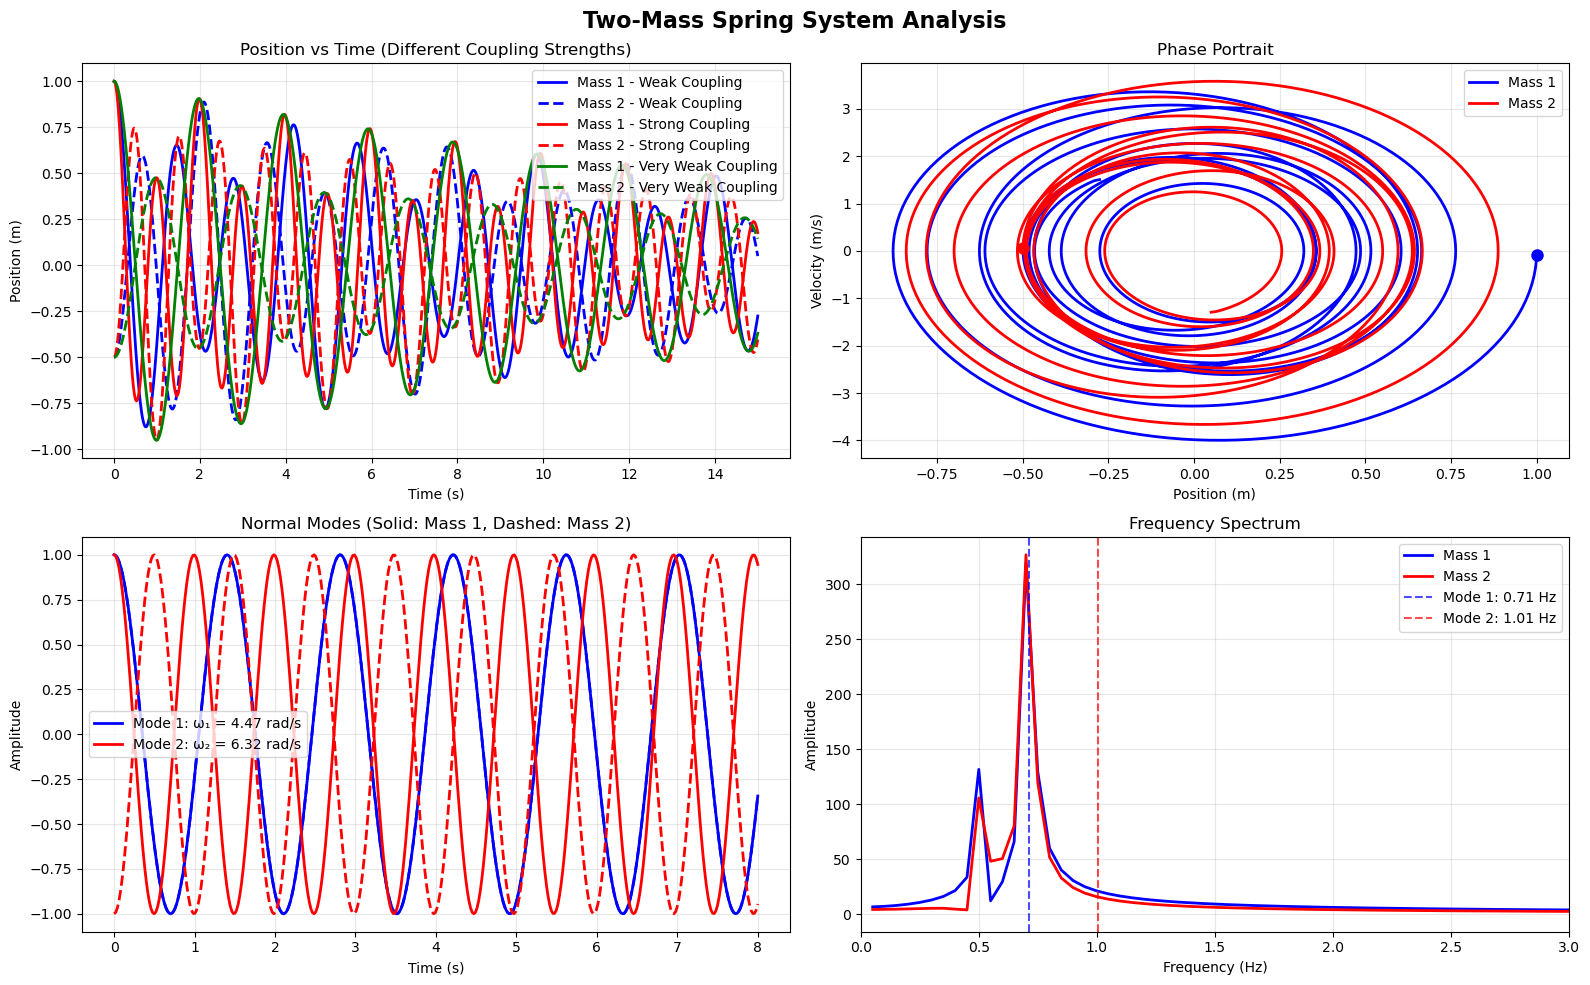


4. Interactive Demo...


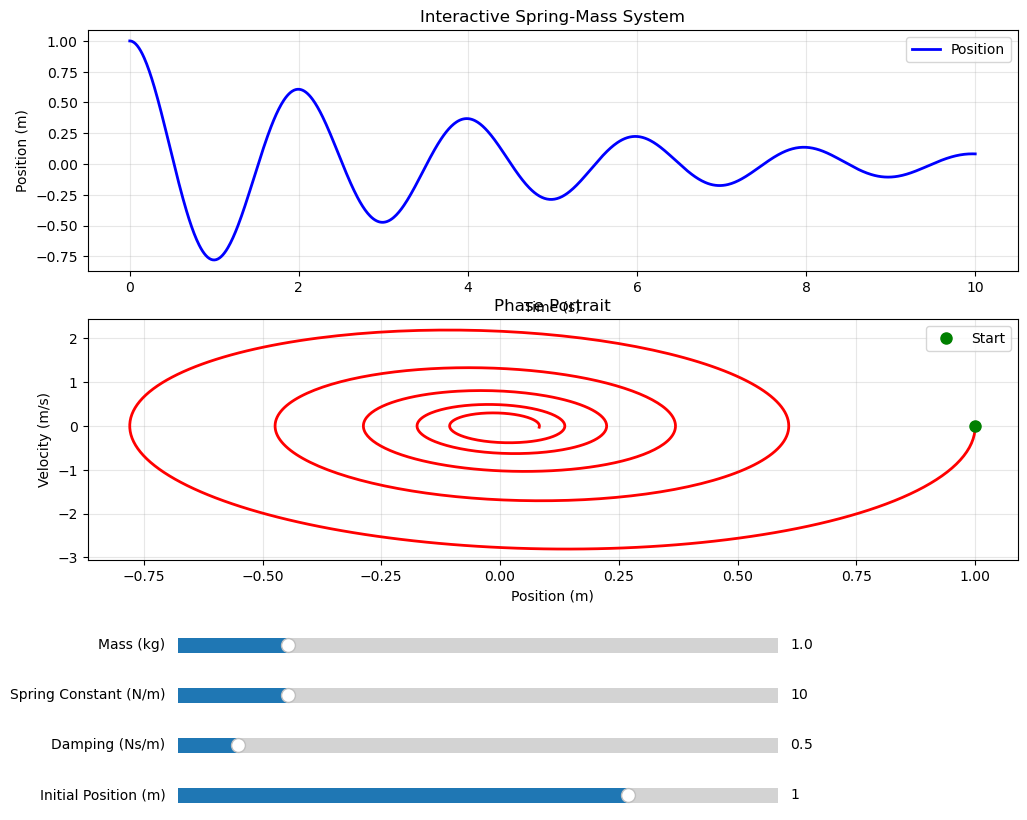


Demo completed! All visualizations should be displayed.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from matplotlib.widgets import Slider, Button
import warnings
warnings.filterwarnings('ignore')

class SpringMassSystem:
    """
    A comprehensive spring-mass system simulator with visualization capabilities.
    Supports single and multiple mass systems with damping.
    """
    
    def __init__(self):
        self.fig = None
        self.ax = None
        self.animation = None
        self.is_playing = False
        
    def single_mass_dynamics(self, state, t, m, k, c):
        """
        Differential equation for single mass-spring-damper system
        state = [position, velocity]
        """
        x, v = state
        dxdt = v
        dvdt = -(k/m) * x - (c/m) * v
        return [dxdt, dvdt]
    
    def double_mass_dynamics(self, state, t, m1, m2, k1, k2, k3, c1, c2):
        """
        Differential equation for two-mass spring system
        state = [x1, v1, x2, v2]
        """
        x1, v1, x2, v2 = state
        
        # Forces on mass 1
        F1 = -k1*x1 - k2*(x1-x2) - c1*v1
        
        # Forces on mass 2  
        F2 = -k2*(x2-x1) - k3*x2 - c2*v2
        
        dx1dt = v1
        dv1dt = F1/m1
        dx2dt = v2
        dv2dt = F2/m2
        
        return [dx1dt, dv1dt, dx2dt, dv2dt]
    
    def simulate_single_mass(self, m=1.0, k=10.0, c=0.5, x0=1.0, v0=0.0, t_max=10.0):
        """
        Simulate single mass-spring-damper system
        """
        t = np.linspace(0, t_max, 1000)
        initial_state = [x0, v0]
        
        solution = odeint(self.single_mass_dynamics, initial_state, t, args=(m, k, c))
        
        return t, solution[:, 0], solution[:, 1]  # time, position, velocity
    
    def simulate_double_mass(self, m1=1.0, m2=1.0, k1=10.0, k2=5.0, k3=10.0, 
                           c1=0.1, c2=0.1, x1_0=1.0, x2_0=-0.5, v1_0=0.0, v2_0=0.0, t_max=15.0):
        """
        Simulate two-mass spring system
        """
        t = np.linspace(0, t_max, 1500)
        initial_state = [x1_0, v1_0, x2_0, v2_0]
        
        solution = odeint(self.double_mass_dynamics, initial_state, t, 
                         args=(m1, m2, k1, k2, k3, c1, c2))
        
        return t, solution[:, 0], solution[:, 2]  # time, x1, x2
    
    def plot_single_mass_analysis(self):
        """
        Create comprehensive analysis plots for single mass system
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Spring-Mass System Analysis', fontsize=16, fontweight='bold')
        
        # Different damping scenarios
        damping_cases = [
            (0.0, 'Undamped', 'blue'),
            (0.5, 'Underdamped', 'green'), 
            (2*np.sqrt(10), 'Critically Damped', 'orange'),
            (5.0, 'Overdamped', 'red')
        ]
        
        # Position vs Time
        for c, label, color in damping_cases:
            t, x, v = self.simulate_single_mass(c=c, t_max=8)
            ax1.plot(t, x, label=label, color=color, linewidth=2)
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Position (m)')
        ax1.set_title('Position vs Time (Different Damping)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Phase Portrait
        for c, label, color in damping_cases[:3]:  # Skip overdamped for clarity
            t, x, v = self.simulate_single_mass(c=c, t_max=8)
            ax2.plot(x, v, label=label, color=color, linewidth=2)
            ax2.plot(x[0], v[0], 'o', color=color, markersize=8)  # Start point
        
        ax2.set_xlabel('Position (m)')
        ax2.set_ylabel('Velocity (m/s)')
        ax2.set_title('Phase Portrait')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Energy Analysis
        t, x, v = self.simulate_single_mass(c=0.1, t_max=8)  # Light damping
        m, k = 1.0, 10.0
        
        kinetic_energy = 0.5 * m * v**2
        potential_energy = 0.5 * k * x**2
        total_energy = kinetic_energy + potential_energy
        
        ax3.plot(t, kinetic_energy, label='Kinetic Energy', color='red', linewidth=2)
        ax3.plot(t, potential_energy, label='Potential Energy', color='blue', linewidth=2)
        ax3.plot(t, total_energy, label='Total Energy', color='black', linewidth=2, linestyle='--')
        
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Energy (J)')
        ax3.set_title('Energy vs Time (Lightly Damped)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Frequency Response
        frequencies = np.logspace(-1, 2, 100)
        m, k, c = 1.0, 10.0, 0.5
        w_n = np.sqrt(k/m)  # Natural frequency
        zeta = c / (2*np.sqrt(k*m))  # Damping ratio
        
        # Transfer function magnitude
        s = 1j * frequencies
        H = 1 / (s**2/w_n**2 + 2*zeta*s/w_n + 1)
        magnitude_db = 20 * np.log10(np.abs(H))
        
        ax4.semilogx(frequencies/w_n, magnitude_db, linewidth=2, color='purple')
        ax4.axvline(x=1, color='red', linestyle='--', alpha=0.7, label='Natural Frequency')
        ax4.set_xlabel('Frequency Ratio (ω/ω_n)')
        ax4.set_ylabel('Magnitude (dB)')
        ax4.set_title('Frequency Response')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def create_animated_single_mass(self, m=1.0, k=10.0, c=0.5, x0=1.0):
        """
        Create animated visualization of single mass system
        """
        # Simulate the system
        t, x, v = self.simulate_single_mass(m=m, k=k, c=c, x0=x0, t_max=10)
        
        # Set up the figure and axis
        self.fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        self.fig.suptitle('Animated Spring-Mass System', fontsize=14, fontweight='bold')
        
        # Animation axis (top)
        ax1.set_xlim(-2, 2)
        ax1.set_ylim(-0.5, 0.5)
        ax1.set_aspect('equal')
        ax1.set_title('Spring-Mass Animation')
        ax1.axhline(0, color='black', linewidth=1, alpha=0.3)
        ax1.axvline(0, color='black', linewidth=1, alpha=0.3)
        
        # Plot axis (bottom)
        ax2.set_xlim(0, 10)
        ax2.set_ylim(min(x)*1.1, max(x)*1.1)
        ax2.set_xlabel('Time (s)')
        ax2.set_ylabel('Position (m)')
        ax2.set_title('Position vs Time')
        ax2.grid(True, alpha=0.3)
        
        # Initialize animated objects
        # Spring (represented as zigzag line)
        spring_x = np.linspace(-1.5, 0, 20)
        spring_y = 0.1 * np.sin(10 * np.pi * np.linspace(0, 1, 20))
        spring_line, = ax1.plot([], [], 'b-', linewidth=3, label='Spring')
        
        # Mass (circle)
        mass_circle = plt.Circle((0, 0), 0.1, color='red', zorder=5)
        ax1.add_patch(mass_circle)
        
        # Wall
        wall_x = [-1.5, -1.5]
        wall_y = [-0.3, 0.3]
        ax1.plot(wall_x, wall_y, 'k-', linewidth=8)
        
        # Position trace
        line, = ax2.plot([], [], 'r-', linewidth=2, label='Position')
        time_marker, = ax2.plot([], [], 'ro', markersize=8)
        
        ax2.legend()
        
        def animate(frame):
            # Current position
            current_x = x[frame]
            
            # Update spring
            spring_x_current = np.linspace(-1.5, current_x - 0.1, 20)
            spring_line.set_data(spring_x_current, spring_y)
            
            # Update mass position
            mass_circle.center = (current_x, 0)
            
            # Update position plot
            line.set_data(t[:frame], x[:frame])
            time_marker.set_data([t[frame]], [x[frame]])
            
            return spring_line, mass_circle, line, time_marker
        
        # Create animation
        self.animation = animation.FuncAnimation(
            self.fig, animate, frames=len(t), interval=20, blit=False, repeat=True
        )
        
        plt.tight_layout()
        plt.show()
        
        return self.animation
    
    def create_double_mass_visualization(self):
        """
        Create visualization for two-mass spring system
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
        fig.suptitle('Two-Mass Spring System Analysis', fontsize=16, fontweight='bold')
        
        # Simulate different scenarios
        scenarios = [
            {'k2': 5.0, 'label': 'Weak Coupling', 'color': 'blue'},
            {'k2': 15.0, 'label': 'Strong Coupling', 'color': 'red'},
            {'k2': 0.1, 'label': 'Very Weak Coupling', 'color': 'green'}
        ]
        
        # Position vs Time
        for scenario in scenarios:
            t, x1, x2 = self.simulate_double_mass(k2=scenario['k2'])
            ax1.plot(t, x1, label=f"Mass 1 - {scenario['label']}", 
                    color=scenario['color'], linewidth=2)
            ax1.plot(t, x2, label=f"Mass 2 - {scenario['label']}", 
                    color=scenario['color'], linewidth=2, linestyle='--')
        
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Position (m)')
        ax1.set_title('Position vs Time (Different Coupling Strengths)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Phase Portrait
        t, x1, x2 = self.simulate_double_mass()
        # Calculate velocities numerically
        dt = t[1] - t[0]
        v1 = np.gradient(x1, dt)
        v2 = np.gradient(x2, dt)
        
        ax2.plot(x1, v1, label='Mass 1', color='blue', linewidth=2)
        ax2.plot(x2, v2, label='Mass 2', color='red', linewidth=2)
        ax2.plot(x1[0], v1[0], 'o', color='blue', markersize=8)
        ax2.plot(x2[0], v2[0], 'o', color='red', markersize=8)
        
        ax2.set_xlabel('Position (m)')
        ax2.set_ylabel('Velocity (m/s)')
        ax2.set_title('Phase Portrait')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Mode Analysis (Normal Modes)
        # For symmetric system, calculate normal mode frequencies
        m1, m2, k1, k2, k3 = 1.0, 1.0, 10.0, 5.0, 10.0
        
        # Mode 1: In-phase (symmetric mode)
        w1_squared = k1/m1 + k3/m2
        w1 = np.sqrt(w1_squared)
        
        # Mode 2: Out-of-phase (antisymmetric mode)  
        w2_squared = w1_squared + 2*k2*(1/m1 + 1/m2)
        w2 = np.sqrt(w2_squared)
        
        t_mode = np.linspace(0, 8, 400)
        
        # Simulate pure modes
        mode1_x1 = np.cos(w1 * t_mode)
        mode1_x2 = np.cos(w1 * t_mode)
        
        mode2_x1 = np.cos(w2 * t_mode)
        mode2_x2 = -np.cos(w2 * t_mode)  # Out of phase
        
        ax3.plot(t_mode, mode1_x1, label=f'Mode 1: ω₁ = {w1:.2f} rad/s', 
                color='blue', linewidth=2)
        ax3.plot(t_mode, mode1_x2, color='blue', linewidth=2, linestyle='--')
        ax3.plot(t_mode, mode2_x1, label=f'Mode 2: ω₂ = {w2:.2f} rad/s', 
                color='red', linewidth=2)
        ax3.plot(t_mode, mode2_x2, color='red', linewidth=2, linestyle='--')
        
        ax3.set_xlabel('Time (s)')
        ax3.set_ylabel('Amplitude')
        ax3.set_title('Normal Modes (Solid: Mass 1, Dashed: Mass 2)')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Frequency Spectrum
        from scipy.fft import fft, fftfreq
        
        t, x1, x2 = self.simulate_double_mass(t_max=20)
        dt = t[1] - t[0]
        
        # FFT of both masses
        fft_x1 = np.abs(fft(x1))
        fft_x2 = np.abs(fft(x2))
        freqs = fftfreq(len(t), dt)
        
        # Only positive frequencies
        pos_mask = freqs > 0
        freqs_pos = freqs[pos_mask]
        fft_x1_pos = fft_x1[pos_mask]
        fft_x2_pos = fft_x2[pos_mask]
        
        ax4.plot(freqs_pos, fft_x1_pos, label='Mass 1', color='blue', linewidth=2)
        ax4.plot(freqs_pos, fft_x2_pos, label='Mass 2', color='red', linewidth=2)
        ax4.axvline(w1/(2*np.pi), color='blue', linestyle='--', alpha=0.7, 
                   label=f'Mode 1: {w1/(2*np.pi):.2f} Hz')
        ax4.axvline(w2/(2*np.pi), color='red', linestyle='--', alpha=0.7, 
                   label=f'Mode 2: {w2/(2*np.pi):.2f} Hz')
        
        ax4.set_xlabel('Frequency (Hz)')
        ax4.set_ylabel('Amplitude')
        ax4.set_title('Frequency Spectrum')
        ax4.set_xlim(0, 3)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def interactive_demo(self):
        """
        Create interactive demo with sliders
        """
        # Initial parameters
        m_init, k_init, c_init = 1.0, 10.0, 0.5
        x0_init = 1.0
        
        # Set up the figure
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
        plt.subplots_adjust(bottom=0.35)
        
        # Initial simulation
        t, x, v = self.simulate_single_mass(m=m_init, k=k_init, c=c_init, x0=x0_init)
        
        # Plot initial data
        line1, = ax1.plot(t, x, 'b-', linewidth=2, label='Position')
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Position (m)')
        ax1.set_title('Interactive Spring-Mass System')
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        line2, = ax2.plot(x, v, 'r-', linewidth=2)
        ax2.plot(x[0], v[0], 'go', markersize=8, label='Start')
        ax2.set_xlabel('Position (m)')
        ax2.set_ylabel('Velocity (m/s)')
        ax2.set_title('Phase Portrait')
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Create sliders
        ax_m = plt.axes([0.2, 0.25, 0.5, 0.03])
        ax_k = plt.axes([0.2, 0.20, 0.5, 0.03])
        ax_c = plt.axes([0.2, 0.15, 0.5, 0.03])
        ax_x0 = plt.axes([0.2, 0.10, 0.5, 0.03])
        
        slider_m = Slider(ax_m, 'Mass (kg)', 0.1, 5.0, valinit=m_init)
        slider_k = Slider(ax_k, 'Spring Constant (N/m)', 1.0, 50.0, valinit=k_init)
        slider_c = Slider(ax_c, 'Damping (Ns/m)', 0.0, 5.0, valinit=c_init)
        slider_x0 = Slider(ax_x0, 'Initial Position (m)', -2.0, 2.0, valinit=x0_init)
        
        def update(val):
            m = slider_m.val
            k = slider_k.val
            c = slider_c.val
            x0 = slider_x0.val
            
            # Recalculate
            t, x, v = self.simulate_single_mass(m=m, k=k, c=c, x0=x0)
            
            # Update plots
            line1.set_data(t, x)
            ax1.relim()
            ax1.autoscale_view()
            
            line2.set_data(x, v)
            ax2.relim()  
            ax2.autoscale_view()
            
            fig.canvas.draw()
        
        # Connect sliders to update function
        slider_m.on_changed(update)
        slider_k.on_changed(update)
        slider_c.on_changed(update)
        slider_x0.on_changed(update)
        
        plt.show()

# Create an instance and run demonstrations
def main():
    """
    Main function to run all demonstrations
    """
    sms = SpringMassSystem()
    
    print("Spring-Mass System Visualization Demo")
    print("=====================================")
    print("\n1. Single Mass System Analysis...")
    sms.plot_single_mass_analysis()
    
    print("\n2. Creating Animated Single Mass System...")
    anim = sms.create_animated_single_mass()
    
    print("\n3. Two-Mass System Analysis...")
    sms.create_double_mass_visualization()
    
    print("\n4. Interactive Demo...")
    sms.interactive_demo()
    
    # print("\nDemo completed! All visualizations should be displayed.")

if __name__ == "__main__":
    main()